In [1]:
%pylab inline
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

Populating the interactive namespace from numpy and matplotlib


In [2]:
# header in first row
# dashes treated as NaN to then be replaced by zeroes
nfl_df = pd.read_csv(filepath_or_buffer="nfl_team_contracts.csv", header=0, na_values='-').fillna(0)

In [3]:
# replace $-sign and comma with empty spaces in preparation of columns that have these values being
# converted to a numeric type
nfl_df = nfl_df.replace(to_replace='[\$,]', value='', regex=True)

In [4]:
nfl_df.dtypes

base_salary        object
cap_hit            object
cap_perc          float64
dead_cap_amt       object
name               object
option_bonus       object
other_bonus        object
position           object
restruct_bonus     object
roster_bonus       object
roster_status      object
signing_bonus      object
team               object
workout_bonus      object
year                int64
dtype: object

In [5]:
# convert columns with monetary values to numeric
# dead_cap_amount is not being converted b/c it will be dropped in further processing 
# it represents what the cap amount would be if the player were cut
nfl_df[['base_salary', 'option_bonus', 'other_bonus','option_bonus', 'restruct_bonus', 'roster_bonus', 'signing_bonus', 'workout_bonus']] = \
    nfl_df[['base_salary', 'option_bonus', 'other_bonus','option_bonus', 'restruct_bonus', 'roster_bonus', 'signing_bonus', 'workout_bonus']].apply(pd.to_numeric)

In [6]:
nfl_df.dtypes

base_salary         int64
cap_hit            object
cap_perc          float64
dead_cap_amt       object
name               object
option_bonus        int64
other_bonus         int64
position           object
restruct_bonus      int64
roster_bonus        int64
roster_status      object
signing_bonus       int64
team               object
workout_bonus       int64
year                int64
dtype: object

In [7]:
# convert position, team and roster_status to categorical data types
nfl_df = nfl_df.astype({'team': 'category', 'position': 'category', 'roster_status': 'category'})

In [8]:
nfl_df.dtypes

base_salary          int64
cap_hit             object
cap_perc           float64
dead_cap_amt        object
name                object
option_bonus         int64
other_bonus          int64
position          category
restruct_bonus       int64
roster_bonus         int64
roster_status     category
signing_bonus        int64
team              category
workout_bonus        int64
year                 int64
dtype: object

In [9]:
# collapse non-salary category into single bonus amount
nfl_df['bonus_total'] =nfl_df[['option_bonus', 'other_bonus','option_bonus', 'restruct_bonus', 'roster_bonus', 'signing_bonus', 'workout_bonus']].apply(func=sum, axis='columns')

In [10]:
# sum base salary and bonus total to  single total money column
nfl_df['total_money'] = nfl_df['base_salary'] + nfl_df['bonus_total']

In [12]:
nfl_df.dtypes

base_salary          int64
cap_hit             object
cap_perc           float64
dead_cap_amt        object
name                object
option_bonus         int64
other_bonus          int64
position          category
restruct_bonus       int64
roster_bonus         int64
roster_status     category
signing_bonus        int64
team              category
workout_bonus        int64
year                 int64
bonus_total          int64
total_money          int64
dtype: object

In [16]:
# output adjusted df to csv file excluding bonus category amounts other than total bonus, cap percentage and dead cap amount
nfl_df[['base_salary','bonus_total', 'name', 'position','roster_status', 'team','total_money', 'year']].to_csv('2_nfl_contracts_pre_process.csv', header=True, index=True, index_label='index')

In [30]:
nfl_df.dtypes

base_salary          int64
cap_hit             object
cap_perc           float64
dead_cap_amt        object
name                object
option_bonus         int64
other_bonus          int64
position          category
restruct_bonus       int64
roster_bonus         int64
roster_status     category
signing_bonus        int64
team              category
workout_bonus        int64
year                 int64
bonus_total          int64
total_money          int64
dtype: object

In [18]:
nfl_df[['base_salary','bonus_total', 'name', 'position','roster_status', 'team','total_money', 'year']].dtypes.to_csv('2_nfl_pre_process_dtypes.csv', index_label='col_name')

C:\Users\jason\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [56]:
# export dtypes from pre-processing phase to csv file
dtypes_nfl = pd.read_csv('2_nfl_pre_process_dtypes.csv', index_col=0, names=['col_dtype'])

In [57]:
# dtypes_dict = dtypes_nfl.col_dtype.to_dict()
dtypes_dict = dtypes_nfl.col_dtype.to_dict()

In [58]:
pd.read_csv('2_nfl_pre_process_dtypes.csv', index_col=0, header=0, dtype=dtypes_dict).dtypes

ValueError: invalid literal for int() with base 10: 'bonus_total'

In [54]:
nfl_df['bonus_total'].describe()

count    4.189700e+04
mean     5.756241e+05
std      1.528388e+06
min     -3.062500e+05
25%      0.000000e+00
50%      6.667000e+03
75%      3.212070e+05
max      3.170000e+07
Name: bonus_total, dtype: float64

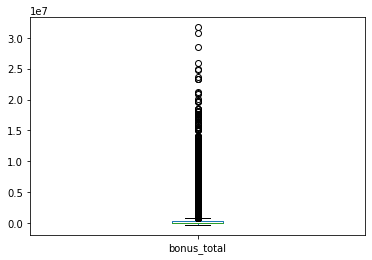

In [55]:
nfl_df['bonus_total'].plot.box()